In [ ]:
### nan값 제거 (2020년~2022년) 데이터 사용
### 제거된 필드: Unnamed: 0
### 불필요한 시간 데이터 행 제거 
### 추가된 필드: 승차일시_t,	배차일시_t,	예정일시_t 
###              승차-예정 시간,	승차-배차 시간,	승차-배차(sec),	주중-주말,	승차_날짜_년,	승차_날짜_월,	승차_날짜_일,	승차_시각, 평일_주말


In [ ]:
# 한글 폰트 설치 (런타임 재시작 필요)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (24.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falli

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
# 경고창 메세지 끄기
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# 데이터 불러오기
yr = ['2020', '2021', '2022' ]
for y in yr:
  path = '/content/gdrive/MyDrive/멀티캠퍼스 5조/2.데이터/일일이용데이터/nan값 제거/nan값 제거_' + y +'년통합.csv'
  globals()['df_{}'.format(y)] = pd.read_csv(path)
  globals()['df_{}'.format(y)].drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
display(df_2020.head(3))
display(df_2021.head(3))
display(df_2022.head(3))

,차량고유번호,차량타입,예정일시,배차일시,승차일시,출발지구군,출발지상세,목적지구군,목적지상세
0,814,중형승합,2020-12-31 오전 12:09:20,2020-12-31 오전 12:11:32,2020-12-31 오전 12:18:08,금천구,시흥제2동,노원구,하계1동
1,1501,중형 승합,2020-12-31 오전 12:34:42,2020-12-31 오전 12:38:53,2020-12-31 오전 12:47:41,강동구,천호제2동,하남시,풍산동
2,1121,중형승합,2020-12-31 오전 1:03:23,2020-12-31 오전 1:06:10,2020-12-31 오전 1:14:45,동작구,흑석동,동작구,신대방제2동


,차량고유번호,차량타입,예정일시,배차일시,승차일시,출발지구군,출발지상세,목적지구군,목적지상세
0,1303,중형승합,2021-05-03 오전 12:11:00,2021-05-03 오전 12:43:08,2021-05-03 오전 1:03:26,동대문구,전농제2동,노원구,중계2.3동
1,8279,중형 승합,2021-05-03 오전 12:31:00,2021-05-03 오전 12:54:59,2021-05-03 오전 1:26:05,광진구,자양제2동,노원구,중계4동
2,7917,중형승합,2021-05-03 오전 12:39:00,2021-05-03 오전 12:43:52,2021-05-03 오전 1:14:53,은평구,진관동,강북구,번제1동


,차량고유번호,차량타입,예정일시,배차일시,승차일시,출발지구군,출발지상세,목적지구군,목적지상세
0,8231,중형승합,2022-03-20 오전 12:37:00,2022-03-20 오전 12:42:21,2022-03-20 오전 1:04:42,동작구,노량진제2동,양천구,목2동
1,6774,중형승합,2022-03-20 오전 1:00:32,2022-03-20 오전 1:15:08,2022-03-20 오전 1:31:45,강북구,수유제1동,도봉구,창제4동
2,7905,중형승합,2022-03-20 오전 1:22:00,2022-03-20 오전 1:32:42,2022-03-20 오전 1:50:06,서초구,방배2동,노원구,중계4동


In [ ]:
"""
def del_time(df_t):
  for i in tqdm(range(len(df_t))):
    if len(df_t.예정일시[i]) < 21 or len(df_t.배차일시[i])< 21 or len(df_t.승차일시[i]) < 21:
      df_t = df_t.drop(index=i)
  df_t = df_t.dropna()
  df_t.reset_index(drop=True, inplace = True)

In [ ]:
# 24 시간 변경 함수 (loc)
def time_re(df_s, idx):
    #lst = ['예정시간', '배차시간', '승차시간']
    add_lst = []
    for i in range(len(df_s)):
        if df_s.loc[i, idx][11:].startswith('오전'):
            tm1 = df_s.loc[i,idx].replace('오전', 'AM')
        else:
            tm1 = df_s.loc[i,idx].replace('오후', 'PM')

        tm2 = datetime.strptime(tm1, '%Y-%m-%d %p %I:%M:%S')
        add_lst.append(tm2)
    df_s[idx+'_t'] = add_lst
    #globals()['df_s.{}_t'.format(idx)] = add_lst
    #df_s.insert(0, idx + '_t', add_lst)

In [ ]:
""" 요거 안됨,,,
df_y = [df_2020, df_2021, df_2022]
for dy in df_y:
  del_time(dy)

100%|██████████| 410109/410109 [00:14<00:00, 27433.38it/s]


In [ ]:
""" 요거 안됨,,,
del_time(df_2020)
del_time(df_2021)
del_time(df_2022)

100%|██████████| 410109/410109 [00:15<00:00, 27247.85it/s]


In [ ]:
"""
def d_(df_s):
  for i in tqdm(range(len(df_s))):
    if len(df_s.예정일시[i]) < 21 or len(df_s.배차일시[i])< 21 or len(df_s.승차일시[i]) < 21:
      df_s = df_s.drop(index=i)
  df_s = df_s.dropna()
  df_s.reset_index(drop=True, inplace = True)

In [ ]:
"""
df_y = [df_2020, df_2021, df_2022]
for y in df_y:
  for i in tqdm(range(len(y))):
    if len(y.예정일시[i]) < 21 or len(y.배차일시[i])< 21 or len(y.승차일시[i]) < 21:
      y = y.drop(index=i)
  y = y.dropna()
  y.reset_index(drop=True, inplace = True)

100%|██████████| 410109/410109 [00:14<00:00, 28597.02it/s]


In [ ]:
# 함수 적용이 안돼서,,,,,,,, for문 3번,,,,,,,,,,,, ㅠㅠ
# 불필요한 시간 데이터 제거 (2020)
for i in tqdm(range(len(df_2020))):
  if len(df_2020.예정일시[i]) < 21 or len(df_2020.배차일시[i])< 21 or len(df_2020.승차일시[i]) < 21:
    df_2020 = df_2020.drop(index=i)
df_2020 = df_2020.dropna()
df_2020.reset_index(drop=True, inplace = True)

100%|██████████| 975326/975326 [00:42<00:00, 23052.20it/s]


In [ ]:
for i in tqdm(range(len(df_2021))):
  if len(df_2021.예정일시[i]) < 21 or len(df_2021.배차일시[i])< 21 or len(df_2021.승차일시[i]) < 21:
    df_2021 = df_2021.drop(index=i)
df_2021 = df_2021.dropna()
df_2021.reset_index(drop=True, inplace = True)

100%|██████████| 1222937/1222937 [01:12<00:00, 16968.55it/s]


In [ ]:
# 데이터 없어졌는지 확인 
df_2020[df_2020.승차일시 == '2020-06-20']

,차량고유번호,차량타입,예정일시,배차일시,승차일시,출발지구군,출발지상세,목적지구군,목적지상세


In [ ]:
for i in tqdm(range(len(df_2022))):
  if len(df_2022.예정일시[i]) < 21 or len(df_2022.배차일시[i])< 21 or len(df_2022.승차일시[i]) < 21:
    df_2022 = df_2022.drop(index=i)
df_2022 = df_2022.dropna()
df_2022.reset_index(drop=True, inplace = True)

100%|██████████| 410109/410109 [00:14<00:00, 28566.54it/s]


In [ ]:
# 정의한 time_re() 함수로 24시간으로 바꿔서 새로운 필드에 넣어주기
df_y = [df_2020, df_2021, df_2022]
col = ['승차일시', '배차일시', '예정일시']
for dy in tqdm(df_y):
  for c in col:
    time_re(dy, c)

100%|██████████| 3/3 [06:08<00:00, 122.95s/it]


In [ ]:
display(df_2020.head(2))
display(df_2021.head(2))
display(df_2022.head(2))

,차량고유번호,차량타입,예정일시,배차일시,승차일시,출발지구군,출발지상세,목적지구군,목적지상세,승차일시_t,배차일시_t,예정일시_t
0,814,중형승합,2020-12-31 오전 12:09:20,2020-12-31 오전 12:11:32,2020-12-31 오전 12:18:08,금천구,시흥제2동,노원구,하계1동,2020-12-31 00:18:08,2020-12-31 00:11:32,2020-12-31 00:09:20
1,1501,중형 승합,2020-12-31 오전 12:34:42,2020-12-31 오전 12:38:53,2020-12-31 오전 12:47:41,강동구,천호제2동,하남시,풍산동,2020-12-31 00:47:41,2020-12-31 00:38:53,2020-12-31 00:34:42


,차량고유번호,차량타입,예정일시,배차일시,승차일시,출발지구군,출발지상세,목적지구군,목적지상세,승차일시_t,배차일시_t,예정일시_t
0,1303,중형승합,2021-05-03 오전 12:11:00,2021-05-03 오전 12:43:08,2021-05-03 오전 1:03:26,동대문구,전농제2동,노원구,중계2.3동,2021-05-03 01:03:26,2021-05-03 00:43:08,2021-05-03 00:11:00
1,8279,중형 승합,2021-05-03 오전 12:31:00,2021-05-03 오전 12:54:59,2021-05-03 오전 1:26:05,광진구,자양제2동,노원구,중계4동,2021-05-03 01:26:05,2021-05-03 00:54:59,2021-05-03 00:31:00


,차량고유번호,차량타입,예정일시,배차일시,승차일시,출발지구군,출발지상세,목적지구군,목적지상세,승차일시_t,배차일시_t,예정일시_t
0,8231,중형승합,2022-03-20 오전 12:37:00,2022-03-20 오전 12:42:21,2022-03-20 오전 1:04:42,동작구,노량진제2동,양천구,목2동,2022-03-20 01:04:42,2022-03-20 00:42:21,2022-03-20 00:37:00
1,6774,중형승합,2022-03-20 오전 1:00:32,2022-03-20 오전 1:15:08,2022-03-20 오전 1:31:45,강북구,수유제1동,도봉구,창제4동,2022-03-20 01:31:45,2022-03-20 01:15:08,2022-03-20 01:00:32


In [ ]:
# 새로운 필드 생성하여 필요한 시간 및 요일 데이터들 넣어주기 !
# 대기시간 계산
df_y = [df_2020, df_2021, df_2022]
for dy in tqdm(df_y): 
  dy['승차-예정 시간'] = dy['승차일시_t'] - dy['예정일시_t'] 
  dy['승차-배차 시간'] = dy['승차일시_t'] - dy['배차일시_t']

  # 승차-배차 시간 (초 단위 변환)
  dy['승차-배차(sec)'] = [dy['승차-배차 시간'][i].seconds for i in range(len(dy))]

  # 승차일시 기준 
  dy['주중-주말'] = [dy.승차일시_t[i].weekday() for i in range(len(dy))] # 월:0 ~ 일: 6
  dy['승차_날짜_년'] = dy['승차일시_t'].dt.year  # 년
  dy['승차_날짜_월'] = dy['승차일시_t'].dt.month # 월
  dy['승차_날짜_일'] = dy['승차일시_t'].dt.day   # 일
  dy['승차_시각'] = dy['승차일시_t'].dt.hour     # 시각

100%|██████████| 3/3 [01:25<00:00, 28.65s/it]


In [ ]:
display(df_2020.head(2))
display(df_2021.head(2))
display(df_2022.head(2))

,차량고유번호,차량타입,예정일시,배차일시,승차일시,출발지구군,출발지상세,목적지구군,목적지상세,승차일시_t,배차일시_t,예정일시_t,승차-예정 시간,승차-배차 시간,승차-배차(sec),주중-주말,승차_날짜_년,승차_날짜_월,승차_날짜_일,승차_시각
0,814,중형승합,2020-12-31 오전 12:09:20,2020-12-31 오전 12:11:32,2020-12-31 오전 12:18:08,금천구,시흥제2동,노원구,하계1동,2020-12-31 00:18:08,2020-12-31 00:11:32,2020-12-31 00:09:20,0 days 00:08:48,0 days 00:06:36,396,3,2020,12,31,0
1,1501,중형 승합,2020-12-31 오전 12:34:42,2020-12-31 오전 12:38:53,2020-12-31 오전 12:47:41,강동구,천호제2동,하남시,풍산동,2020-12-31 00:47:41,2020-12-31 00:38:53,2020-12-31 00:34:42,0 days 00:12:59,0 days 00:08:48,528,3,2020,12,31,0


,차량고유번호,차량타입,예정일시,배차일시,승차일시,출발지구군,출발지상세,목적지구군,목적지상세,승차일시_t,배차일시_t,예정일시_t,승차-예정 시간,승차-배차 시간,승차-배차(sec),주중-주말,승차_날짜_년,승차_날짜_월,승차_날짜_일,승차_시각
0,1303,중형승합,2021-05-03 오전 12:11:00,2021-05-03 오전 12:43:08,2021-05-03 오전 1:03:26,동대문구,전농제2동,노원구,중계2.3동,2021-05-03 01:03:26,2021-05-03 00:43:08,2021-05-03 00:11:00,0 days 00:52:26,0 days 00:20:18,1218,0,2021,5,3,1
1,8279,중형 승합,2021-05-03 오전 12:31:00,2021-05-03 오전 12:54:59,2021-05-03 오전 1:26:05,광진구,자양제2동,노원구,중계4동,2021-05-03 01:26:05,2021-05-03 00:54:59,2021-05-03 00:31:00,0 days 00:55:05,0 days 00:31:06,1866,0,2021,5,3,1


,차량고유번호,차량타입,예정일시,배차일시,승차일시,출발지구군,출발지상세,목적지구군,목적지상세,승차일시_t,배차일시_t,예정일시_t,승차-예정 시간,승차-배차 시간,승차-배차(sec),주중-주말,승차_날짜_년,승차_날짜_월,승차_날짜_일,승차_시각
0,8231,중형승합,2022-03-20 오전 12:37:00,2022-03-20 오전 12:42:21,2022-03-20 오전 1:04:42,동작구,노량진제2동,양천구,목2동,2022-03-20 01:04:42,2022-03-20 00:42:21,2022-03-20 00:37:00,0 days 00:27:42,0 days 00:22:21,1341,6,2022,3,20,1
1,6774,중형승합,2022-03-20 오전 1:00:32,2022-03-20 오전 1:15:08,2022-03-20 오전 1:31:45,강북구,수유제1동,도봉구,창제4동,2022-03-20 01:31:45,2022-03-20 01:15:08,2022-03-20 01:00:32,0 days 00:31:13,0 days 00:16:37,997,6,2022,3,20,1


In [ ]:
df_y = [df_2020, df_2021, df_2022]
for dy in tqdm(df_y):
  dy['평일_주말'] = 99 # 필드 생성 후 임의의 값 넣기
  for i in range(len(dy)):  
    if dy['주중-주말'][i] == 5 or dy['주중-주말'][i] == 6:
      dy['평일_주말'][i] = 1
    else:
      dy['평일_주말'][i] = 0

100%|██████████| 3/3 [16:01<00:00, 320.46s/it]


In [ ]:
display(df_2020.head(2))
display(df_2021.head(2))
display(df_2022.head(2))

,차량고유번호,차량타입,예정일시,배차일시,승차일시,출발지구군,출발지상세,목적지구군,목적지상세,승차일시_t,...,예정일시_t,승차-예정 시간,승차-배차 시간,승차-배차(sec),주중-주말,승차_날짜_년,승차_날짜_월,승차_날짜_일,승차_시각,평일_주말
0,814,중형승합,2020-12-31 오전 12:09:20,2020-12-31 오전 12:11:32,2020-12-31 오전 12:18:08,금천구,시흥제2동,노원구,하계1동,2020-12-31 00:18:08,...,2020-12-31 00:09:20,0 days 00:08:48,0 days 00:06:36,396,3,2020,12,31,0,0
1,1501,중형 승합,2020-12-31 오전 12:34:42,2020-12-31 오전 12:38:53,2020-12-31 오전 12:47:41,강동구,천호제2동,하남시,풍산동,2020-12-31 00:47:41,...,2020-12-31 00:34:42,0 days 00:12:59,0 days 00:08:48,528,3,2020,12,31,0,0


,차량고유번호,차량타입,예정일시,배차일시,승차일시,출발지구군,출발지상세,목적지구군,목적지상세,승차일시_t,...,예정일시_t,승차-예정 시간,승차-배차 시간,승차-배차(sec),주중-주말,승차_날짜_년,승차_날짜_월,승차_날짜_일,승차_시각,평일_주말
0,1303,중형승합,2021-05-03 오전 12:11:00,2021-05-03 오전 12:43:08,2021-05-03 오전 1:03:26,동대문구,전농제2동,노원구,중계2.3동,2021-05-03 01:03:26,...,2021-05-03 00:11:00,0 days 00:52:26,0 days 00:20:18,1218,0,2021,5,3,1,0
1,8279,중형 승합,2021-05-03 오전 12:31:00,2021-05-03 오전 12:54:59,2021-05-03 오전 1:26:05,광진구,자양제2동,노원구,중계4동,2021-05-03 01:26:05,...,2021-05-03 00:31:00,0 days 00:55:05,0 days 00:31:06,1866,0,2021,5,3,1,0


,차량고유번호,차량타입,예정일시,배차일시,승차일시,출발지구군,출발지상세,목적지구군,목적지상세,승차일시_t,...,예정일시_t,승차-예정 시간,승차-배차 시간,승차-배차(sec),주중-주말,승차_날짜_년,승차_날짜_월,승차_날짜_일,승차_시각,평일_주말
0,8231,중형승합,2022-03-20 오전 12:37:00,2022-03-20 오전 12:42:21,2022-03-20 오전 1:04:42,동작구,노량진제2동,양천구,목2동,2022-03-20 01:04:42,...,2022-03-20 00:37:00,0 days 00:27:42,0 days 00:22:21,1341,6,2022,3,20,1,1
1,6774,중형승합,2022-03-20 오전 1:00:32,2022-03-20 오전 1:15:08,2022-03-20 오전 1:31:45,강북구,수유제1동,도봉구,창제4동,2022-03-20 01:31:45,...,2022-03-20 01:00:32,0 days 00:31:13,0 days 00:16:37,997,6,2022,3,20,1,1


In [ ]:
p_path = '/content/gdrive/MyDrive/멀티캠퍼스 5조/2.데이터/통합 데이터'
folder_names = ['2020년', '2021년', '2022년']
df_y = [df_2020, df_2021, df_2022]
for fn, dy in zip(folder_names,df_y ):
  dy.to_csv(p_path + '/nan값 제거_' + fn + '통합_평일주말.csv', index=False)
# nan값 제거_2021년통합.csv'

numpy.int64

  0%|          | 0/3 [00:00<?, ?it/s]

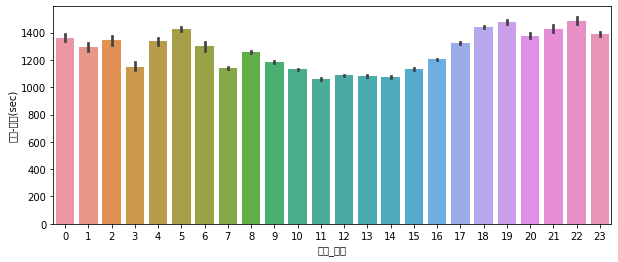

 33%|███▎      | 1/3 [00:14<00:28, 14.46s/it]

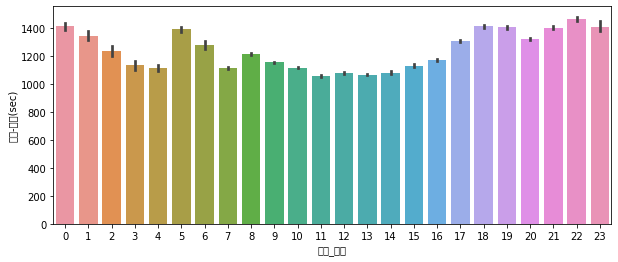

 67%|██████▋   | 2/3 [00:33<00:17, 17.02s/it]

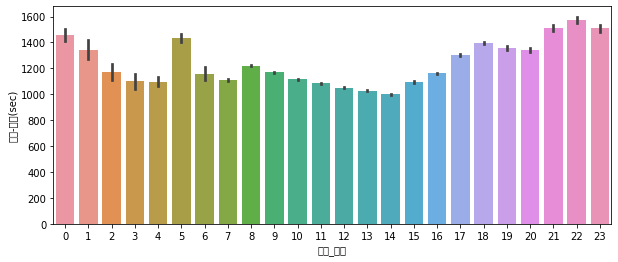

100%|██████████| 3/3 [00:39<00:00, 13.07s/it]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.figure(figsize = (10,4))
df_y = [df_2020, df_2021, df_2022]
for dy in tqdm(df_y):
  plt.figure(figsize = (10,4))
  sns.barplot(x = '승차_시각', y = '승차-배차(sec)', data = dy);
  plt.show()
  #sns.set_title("Title")